# How to reach 94% Accuracy on CIFAR-10 using fast.ai

- 94% is [SOTA](https://paperswithcode.com/sota/image-classification-on-cifar-10) using a standard ResNet-50 model

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz
!mkdir data
!tar zxf cifar10.tgz -C data/

In [ ]:
data_path = 'data/cifar10/'
np.random.seed(1)

# data = ImageDataBunch.from_folder(data_path, train="train", valid="test", ds_tfms=None, size=64, num_workers=0).normalize(imagenet_stats)

data = (ImageList.from_folder(data_path)
            .split_by_folder(train='train', valid='test')
            .label_from_folder()
            .transform(get_transforms(), size=64)
            .databunch(bs=64)
            .normalize(imagenet_stats)
      )


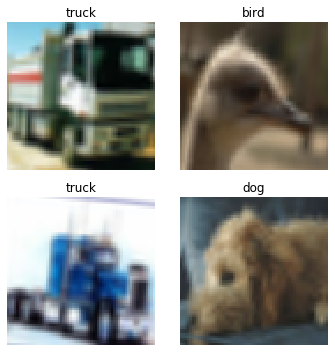

In [ ]:
data.show_batch(rows=2, figsize=(5,5))

In [ ]:
# | note: this by default loads a pretrained model on imagenet, with all layers but the last dense layers freezed
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], true_wd=False)

## Stage-1: Training freezed model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


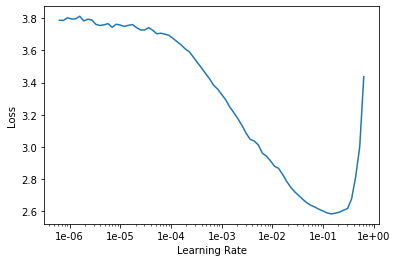

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr1 = 1e-3
learn.fit_one_cycle(3, lr1)
learn.save('stage-1')

epoch,train_loss,valid_loss,accuracy,time
0,0.601183,0.427653,0.849900,02:35
1,0.439490,0.351289,0.892800,02:34
2,0.351531,0.283197,0.909300,02:32


In [ ]:
learn.load('stage-1')

## Stage-2: Fine-tuning complete model

In [ ]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


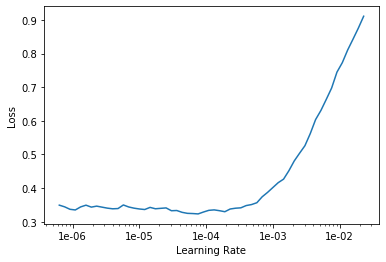

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr2 = lr1/5
learn.fit_one_cycle(5, slice(1e-5, lr2))
learn.save('stage-2')

epoch,train_loss,valid_loss,accuracy,time
0,0.334838,0.279103,0.913200,02:51
1,0.318703,0.280427,0.913200,02:51
2,0.255018,0.235305,0.929100,02:50
3,0.196741,0.197686,0.939500,02:51
4,0.151959,0.193140,0.941400,02:51


In [ ]:
learn.load('stage-2')

## Stage-3: More fine-tuning

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


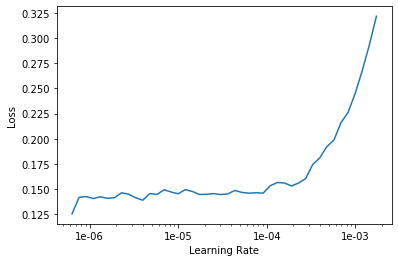

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr3 = lr2/5
learn.fit_one_cycle(5, slice(1e-5, lr3))
learn.save('stage-3')

epoch,train_loss,valid_loss,accuracy,time
0,0.154246,0.202512,0.939100,02:50
1,0.164355,0.204867,0.940200,02:51
2,0.146242,0.196040,0.942200,02:51
3,0.110385,0.192507,0.942700,02:51
4,0.098879,0.186708,0.945300,02:51
